
## Bike Sharing Assignment

#### Problem Statement:
This assignment is to predict the demand for shared bikes.

Essentially, the company wants —

-Which variables are significant in predicting the demand for shared bikes.

-How well those variables describe the bike demands


## Step 1: Reading and Understanding the Data

Import the 'day.csv' file and understand the data 

In [1]:
import numpy as np
import pandas as pd

In [2]:
bike_data = pd.read_csv("day.csv")

In [3]:
#checking head of the dataset 
bike_data.head(100)

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0         1  01-01-2018       1   0     1        0        1           1   
1         2  02-01-2018       1   0     1        0        2           1   
2         3  03-01-2018       1   0     1        0        3           1   
3         4  04-01-2018       1   0     1        0        4           1   
4         5  05-01-2018       1   0     1        0        5           1   
..      ...         ...     ...  ..   ...      ...      ...         ...   
95       96  06-04-2018       2   0     4        0        5           1   
96       97  07-04-2018       2   0     4        0        6           0   
97       98  08-04-2018       2   0     4        0        0           0   
98       99  09-04-2018       2   0     4        0        1           1   
99      100  10-04-2018       2   0     4        0        2           1   

    weathersit       temp     atemp      hum  windspeed  casual  registered  \
0            2  14.110847  18.18125  80.5833  10.749882     331         654   
1            2  14.902598  17.68695  69.6087  16.652113     131         670   
2            1   8.050924   9.47025  43.7273  16.636703     120        1229   
3            1   8.200000  10.60610  59.0435  10.739832     108        1454   
4            1   9.305237  11.46350  43.6957  12.522300      82        1518   
..         ...        ...       ...      ...        ...     ...         ...   
95           1  16.024153  19.38040  47.0833  17.625221     413        2395   
96           1  17.937500  21.68480  60.2917  10.874904     571        2570   
97           2  13.769153  16.22395  83.6250  15.208464     172        1299   
98           2  14.042500  17.07645  87.7500   8.916561     879        1576   
99           2  17.493347  21.33685  85.7500   9.833389    1188        1707   

     cnt  
0    985  
1    801  
2   1349  
3   1562  
4   1600  
..   ...  
95  2808  
96  3141  
97  1471  
98  2455  
99  2895  

[100 rows x 16 columns]

In [4]:
bike_data.shape

(730, 16)

In [5]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
bike_data.describe()

instant      season          yr        mnth     holiday     weekday  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean   365.500000    2.498630    0.500000    6.526027    0.028767    2.995890   
std    210.877136    1.110184    0.500343    3.450215    0.167266    2.000339   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.250000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    365.500000    3.000000    0.500000    7.000000    0.000000    3.000000   
75%    547.750000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    730.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean     0.690411    1.394521   20.319259   23.726322   62.765175   12.763620   
std      0.462641    0.544807    7.506729    8.150308   14.237589    5.195841   
min      0.000000    1.000000    2.424346    3.953480    0.000000    1.500244   
25%      0.000000    1.000000   13.811885   16.889713   52.000000    9.041650   
50%      1.000000    1.000000   20.465826   24.368225   62.625000   12.125325   
75%      1.000000    2.000000   26.880615   30.445775   72.989575   15.625589   
max      1.000000    3.000000   35.328347   42.044800   97.250000   34.000021   

            casual   registered          cnt  
count   730.000000   730.000000   730.000000  
mean    849.249315  3658.757534  4508.006849  
std     686.479875  1559.758728  1936.011647  
min       2.000000    20.000000    22.000000  
25%     316.250000  2502.250000  3169.750000  
50%     717.000000  3664.500000  4548.500000  
75%    1096.500000  4783.250000  5966.000000  
max    3410.000000  6946.000000  8714.000000

In [7]:
#replace the values with dataset for categorical columns -Season,weather ,month,weekday
#this will help to convert int to object data type which can be helpful for dummy variable 


#(1:spring, 2:summer, 3:fall, 4:winter)
season1 = {1:'spring',2:'summer',3:'fall',4:'winter'}
bike_data['season'] = bike_data['season'].map(season1)

#(1:'Clear', 2:Mist, 3:Snow, 4:Rain)
weather1 = {1:'Clear',2:'Mist',3:'LightSnow',4:'HeavyRain'}
bike_data['weathersit'] = bike_data['weathersit'].map(weather1)

mon = {1:'Jan',2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sept', 10:'Oct', 11:'Nov', 12:'Dec'}
bike_data['mnth'] = bike_data['mnth'].map(mon)

day= {1:'Mon', 2:'Tue', 3:'Wed',4:'Thr',5:'Fri',6:'Sat',0:'Sun'}
bike_data['weekday'] = bike_data['weekday'].map(day)




In [8]:
bike_data.head(10)

instant      dteday  season  yr mnth  holiday weekday  workingday  \
0        1  01-01-2018  spring   0  Jan        0     Mon           1   
1        2  02-01-2018  spring   0  Jan        0     Tue           1   
2        3  03-01-2018  spring   0  Jan        0     Wed           1   
3        4  04-01-2018  spring   0  Jan        0     Thr           1   
4        5  05-01-2018  spring   0  Jan        0     Fri           1   
5        6  06-01-2018  spring   0  Jan        0     Sat           0   
6        7  07-01-2018  spring   0  Jan        0     Sun           0   
7        8  08-01-2018  spring   0  Jan        0     Mon           1   
8        9  09-01-2018  spring   0  Jan        0     Tue           1   
9       10  10-01-2018  spring   0  Jan        0     Wed           1   

  weathersit       temp     atemp      hum  windspeed  casual  registered  \
0       Mist  14.110847  18.18125  80.5833  10.749882     331         654   
1       Mist  14.902598  17.68695  69.6087  16.652113     131         670   
2      Clear   8.050924   9.47025  43.7273  16.636703     120        1229   
3      Clear   8.200000  10.60610  59.0435  10.739832     108        1454   
4      Clear   9.305237  11.46350  43.6957  12.522300      82        1518   
5      Clear   8.378268  11.66045  51.8261   6.000868      88        1518   
6       Mist   8.057402  10.44195  49.8696  11.304642     148        1362   
7       Mist   6.765000   8.11270  53.5833  17.875868      68         891   
8      Clear   5.671653   5.80875  43.4167  24.250650      54         768   
9      Clear   6.184153   7.54440  48.2917  14.958889      41        1280   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  
5  1606  
6  1510  
7   959  
8   822  
9  1321

In [9]:
bike_data.holiday.value_counts()

0    709
1     21
Name: holiday, dtype: int64

In [10]:
bike_data.season

0      spring
1      spring
2      spring
3      spring
4      spring
        ...  
725    spring
726    spring
727    spring
728    spring
729    spring
Name: season, Length: 730, dtype: object

In [11]:
bike_data.weathersit.value_counts()

Clear        463
Mist         246
LightSnow     21
Name: weathersit, dtype: int64

In [12]:
#the data type for categorical columns are object now.
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    object 
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    object 
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    object 
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    object 
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(7), object(5)
memory usage: 91.4+ KB


## Step 2: Performing EDA
### Data visualisation 

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

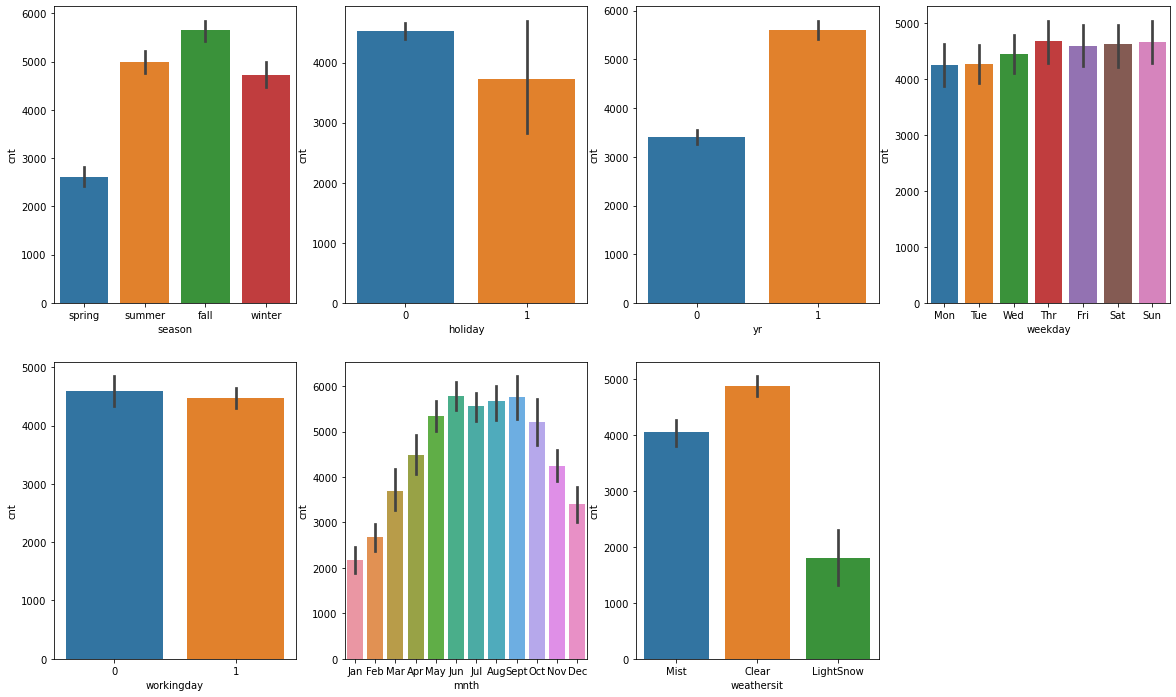

In [14]:
plt.figure(figsize=(20, 12))
plt.subplot(2,4,1)
sns.barplot(x = 'season', y = 'cnt', data = bike_data)
plt.subplot(2,4,2)
sns.barplot(x = 'holiday', y = 'cnt', data = bike_data)
plt.subplot(2,4,3)
sns.barplot(x = 'yr', y = 'cnt', data = bike_data)
plt.subplot(2,4,4)
sns.barplot(x = 'weekday', y = 'cnt', data = bike_data)
plt.subplot(2,4,5)
sns.barplot(x = 'workingday', y = 'cnt', data = bike_data)
plt.subplot(2,4,6)
sns.barplot(x = 'mnth', y = 'cnt', data = bike_data)
plt.subplot(2,4,7)
sns.barplot(x = 'weathersit', y = 'cnt', data = bike_data)
plt.show()

## Inference

1.Bike sharing demand is high in fall season and less in spring.

2.On clear weather the bike renting is high than misty and snowy days.

3.The bike renting spiked up for months between June to September.

4.We can see that the bike rentals were more in 2019 than 2018.

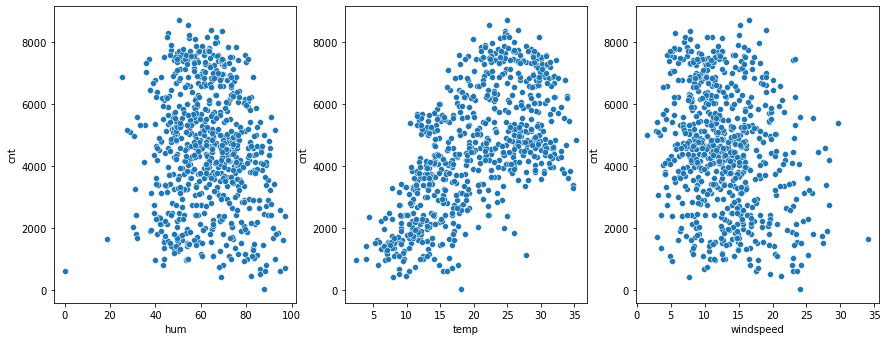

In [15]:
plt.figure(figsize=(20, 12))
plt.subplot(2,4,1)
sns.scatterplot(x = 'hum', y = 'cnt', data = bike_data)
plt.subplot(2,4,2)
sns.scatterplot(x = 'temp', y = 'cnt', data = bike_data)
plt.subplot(2,4,3)
sns.scatterplot(x = 'windspeed', y = 'cnt', data = bike_data)
plt.show()

## Inference 
1. We can see bike rentals are prefered when the humdity is about 50 - 70 .
2. We can see from temp vs cnt that bike rentals are prefered between 10-20 and 25-30 Celsius
3.from windspeed vs cnt we can say that when the wind speed is about 5 to 15  the rentals are more.

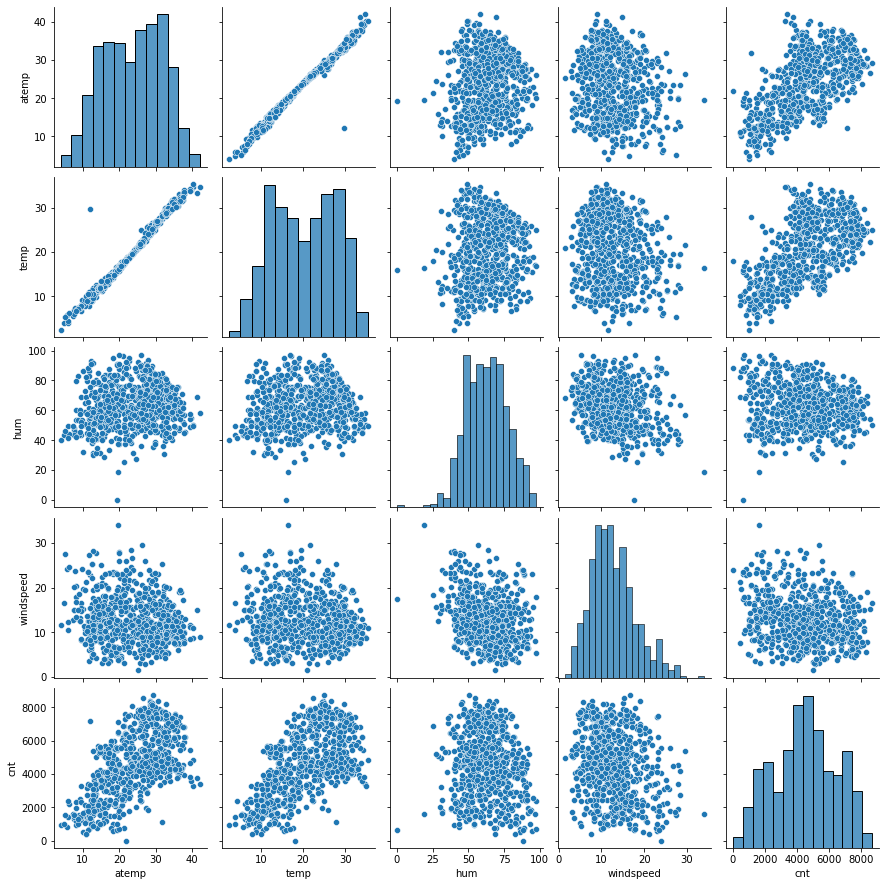

In [16]:
#plt.figure(figsize=(100, 100))
pair_data=bike_data[['atemp','temp','hum','windspeed','cnt']]
sns.pairplot(pair_data)
plt.show()

## Inference 
From the above pair plot for numeric variables , 'temp' and 'atemp' are highly correlated. but as atemp and temp are highly correlated, 
I will be using 'temp' variable.

## Step 3: Data Preparation

### Dummy Variables
1.Create Dummy Variables for categorical columns- season,weathersit,month,weekday and dropping the first column- to get n-1 levels.

2.Drop the actual columns which we created dummies for.

3.Drop un-used columns 'instant','dteday','casual','registered'.

4.Check the correlation.

5.As 'temp' and 'atemp' are highly co-rellated - I am choosing 'temp' for my modelling and dropping 'atemp'.



In [17]:
seasondum = pd.get_dummies(bike_data['season'])

In [18]:
seasondum

fall  spring  summer  winter
0       0       1       0       0
1       0       1       0       0
2       0       1       0       0
3       0       1       0       0
4       0       1       0       0
..    ...     ...     ...     ...
725     0       1       0       0
726     0       1       0       0
727     0       1       0       0
728     0       1       0       0
729     0       1       0       0

[730 rows x 4 columns]

In [19]:
weatherdum = pd.get_dummies(bike_data['weathersit'])

In [20]:
weatherdum

Clear  LightSnow  Mist
0        0          0     1
1        0          0     1
2        1          0     0
3        1          0     0
4        1          0     0
..     ...        ...   ...
725      0          0     1
726      0          0     1
727      0          0     1
728      1          0     0
729      0          0     1

[730 rows x 3 columns]

In [21]:
mondum = pd.get_dummies(bike_data['mnth'])

In [22]:
mondum

Apr  Aug  Dec  Feb  Jan  Jul  Jun  Mar  May  Nov  Oct  Sept
0      0    0    0    0    1    0    0    0    0    0    0     0
1      0    0    0    0    1    0    0    0    0    0    0     0
2      0    0    0    0    1    0    0    0    0    0    0     0
3      0    0    0    0    1    0    0    0    0    0    0     0
4      0    0    0    0    1    0    0    0    0    0    0     0
..   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   ...
725    0    0    1    0    0    0    0    0    0    0    0     0
726    0    0    1    0    0    0    0    0    0    0    0     0
727    0    0    1    0    0    0    0    0    0    0    0     0
728    0    0    1    0    0    0    0    0    0    0    0     0
729    0    0    1    0    0    0    0    0    0    0    0     0

[730 rows x 12 columns]

In [23]:
daydum=pd.get_dummies(bike_data['weekday'])

In [24]:
daydum

Fri  Mon  Sat  Sun  Thr  Tue  Wed
0      0    1    0    0    0    0    0
1      0    0    0    0    0    1    0
2      0    0    0    0    0    0    1
3      0    0    0    0    1    0    0
4      1    0    0    0    0    0    0
..   ...  ...  ...  ...  ...  ...  ...
725    1    0    0    0    0    0    0
726    0    0    1    0    0    0    0
727    0    0    0    1    0    0    0
728    0    1    0    0    0    0    0
729    0    0    0    0    0    1    0

[730 rows x 7 columns]

In [25]:
seasondum = pd.get_dummies(bike_data['season'], drop_first = True)
weatherdum = pd.get_dummies(bike_data['weathersit'], drop_first = True)
mondum = pd.get_dummies(bike_data['mnth'], drop_first = True)
daydum=pd.get_dummies(bike_data['weekday'], drop_first = True)

In [26]:
bike_data = pd.concat([bike_data, seasondum], axis = 1)
bike_data = pd.concat([bike_data, weatherdum], axis = 1)
bike_data = pd.concat([bike_data, mondum], axis = 1)
bike_data = pd.concat([bike_data, daydum], axis = 1)


In [27]:

bike_data.drop(['instant','dteday','casual','registered'], axis = 1, inplace = True)

In [28]:
bike_data.drop(['season','mnth','weekday','weathersit'], axis = 1, inplace = True)

In [29]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   yr          730 non-null    int64  
 1   holiday     730 non-null    int64  
 2   workingday  730 non-null    int64  
 3   temp        730 non-null    float64
 4   atemp       730 non-null    float64
 5   hum         730 non-null    float64
 6   windspeed   730 non-null    float64
 7   cnt         730 non-null    int64  
 8   spring      730 non-null    uint8  
 9   summer      730 non-null    uint8  
 10  winter      730 non-null    uint8  
 11  LightSnow   730 non-null    uint8  
 12  Mist        730 non-null    uint8  
 13  Aug         730 non-null    uint8  
 14  Dec         730 non-null    uint8  
 15  Feb         730 non-null    uint8  
 16  Jan         730 non-null    uint8  
 17  Jul         730 non-null    uint8  
 18  Jun         730 non-null    uint8  
 19  Mar         730 non-null    u

In [30]:
bike_data.corr()

yr   holiday  workingday      temp     atemp       hum  \
yr          1.000000e+00  0.008195   -0.011852  0.048789  0.047215 -0.112547   
holiday     8.195345e-03  1.000000   -0.257009 -0.028764 -0.032703 -0.015662   
workingday -1.185197e-02 -0.257009    1.000000  0.002044  0.010657  0.053770   
temp        4.878919e-02 -0.028764    0.002044  1.000000  0.991696  0.128565   
atemp       4.721519e-02 -0.032703    0.010657  0.991696  1.000000  0.141512   
hum        -1.125471e-01 -0.015662    0.053770  0.128565  0.141512  1.000000   
windspeed  -1.162435e-02  0.006257   -0.002453 -0.158186 -0.183876 -0.248506   
cnt         5.697285e-01 -0.068764   -0.027640  0.627044  0.630685 -0.098543   
spring     -1.623119e-17  0.034642   -0.022507 -0.619408 -0.624772 -0.184884   
summer     -5.254075e-18 -0.024408    0.013405  0.154876  0.163151 -0.002870   
winter      1.700090e-17  0.016785    0.014538 -0.225590 -0.205634  0.163908   
LightSnow  -7.375810e-02 -0.029619    0.044340 -0.058461 -0.064937  0.267592   
Mist       -5.796152e-03 -0.018668   -0.061689 -0.096297 -0.092933  0.490628   
Aug         8.592246e-18 -0.052432    0.023324  0.354648  0.330939  0.021580   
Dec         1.091079e-17  0.006363   -0.019189 -0.285664 -0.277484  0.082200   
Feb         1.428651e-19  0.011980   -0.007382 -0.310626 -0.310845 -0.130521   
Jan        -1.363849e-19  0.035760    0.002067 -0.431505 -0.439006 -0.089555   
Jul        -1.363849e-19  0.006363    0.002067  0.432722  0.429350 -0.063757   
Jun        -4.983560e-18 -0.051502   -0.004581  0.308314  0.300768 -0.109048   
Mar        -1.363849e-19 -0.052432    0.002067 -0.174923 -0.173135 -0.083887   
May        -1.363849e-19  0.006363    0.012696  0.165188  0.170447  0.131273   
Nov        -7.198476e-18  0.067852   -0.004581 -0.206690 -0.196877 -0.005837   
Oct         8.592246e-18  0.006363    0.012696 -0.017616 -0.004775  0.141557   
Sept       -9.413392e-18  0.008175   -0.026157  0.197729  0.192477  0.183118   
Mon        -3.903600e-03 -0.070541    0.274469 -0.036300 -0.032975 -0.006715   
Sat         2.175587e-19 -0.046701   -0.608682  0.015893  0.006275 -0.034419   
Sun         2.175587e-19 -0.023254   -0.608682 -0.012179 -0.012008 -0.035172   
Thr         2.175587e-19 -0.046701    0.264464  0.022984  0.025261  0.002538   
Tue         3.903600e-03  0.046228    0.232252 -0.022016 -0.017836  0.025340   
Wed         6.526760e-19  0.187768    0.179692  0.004621  0.005042  0.019666   

            windspeed       cnt        spring        summer  ...  \
yr          -0.011624  0.569728 -1.623119e-17 -5.254075e-18  ...   
holiday      0.006257 -0.068764  3.464187e-02 -2.440810e-02  ...   
workingday  -0.002453 -0.027640 -2.250665e-02  1.340523e-02  ...   
temp        -0.158186  0.627044 -6.194080e-01  1.548756e-01  ...   
atemp       -0.183876  0.630685 -6.247724e-01  1.631513e-01  ...   
hum         -0.248506 -0.098543 -1.848840e-01 -2.870035e-03  ...   
windspeed    1.000000 -0.235132  1.788801e-01  9.742067e-02  ...   
cnt         -0.235132  1.000000 -5.617018e-01  1.453245e-01  ...   
spring       0.178880 -0.561702  1.000000e+00 -3.320989e-01  ...   
summer       0.097421  0.145325 -3.320989e-01  1.000000e+00  ...   
winter      -0.135612  0.064619 -3.248593e-01 -3.296500e-01  ...   
LightSnow    0.117332 -0.240602 -2.240000e-02 -4.328301e-02  ...   
Mist        -0.037177 -0.170686  2.919789e-02  4.001122e-02  ...   
Aug         -0.069125  0.182100 -1.742860e-01 -1.768562e-01  ...   
Dec         -0.054616 -0.173878  7.652343e-02 -1.768562e-01  ...   
Feb          0.096093 -0.273848  5.038592e-01 -1.673311e-01  ...   
Jan          0.062117 -0.367167  5.325406e-01 -1.768562e-01  ...   
Jul         -0.096090  0.166236 -1.742860e-01 -1.768562e-01  ...   
Jun         -0.019624  0.195568 -1.711958e-01  2.857575e-01  ...   
Mar          0.126575 -0.128456  2.817311e-01  7.211912e-02  ...   
May         -0.029534  0.132553 -1.742860e-01  5.248014e-01  ...   
Nov         -0.025873 -0.040344 -1.711958e-01

In [31]:
bike_data.drop(['atemp'], axis = 1, inplace = True)


## Step 4: Splitting the Data into Training and Testing Sets

The first basic step for regression is performing a train-test split.

In [32]:
from sklearn.model_selection import train_test_split
# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train,df_test=train_test_split(bike_data,train_size=0.7,test_size=0.3,random_state=100)

### Rescaling the Features 

It is extremely important to rescale the variables so that they have a comparable scale. If we don't have comparable scales, then some of the coefficients as obtained by fitting the regression model might be very large or very small as compared to the other coefficients. It is advised to use standardization or normalization so that the units of the coefficients obtained are all on the same scale.There are two common ways of rescaling:

1. Min-Max scaling 
2. Standardisation (mean-0, sigma-1) 

I  am choosing to use MinMax scaling.

In [33]:
#MinMax scaling, brings all the data in the range of 0-1
from sklearn.preprocessing import MinMaxScaler

In [34]:
scaler = MinMaxScaler()

In [35]:
num_vars = ['temp', 'hum', 'windspeed', 'cnt']


df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

<ipython-input-35-6659f38fc12e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
C:\Users\Sai Shruti\anaconda3\lib\site-packages\pandas\core\indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


In [36]:
df_train.head()

yr  holiday  workingday      temp       hum  windspeed       cnt  spring  \
653   1        0           1  0.509887  0.575354   0.300794  0.864243       0   
576   1        0           1  0.815169  0.725633   0.264686  0.827658       0   
426   1        0           0  0.442393  0.640189   0.255342  0.465255       1   
728   1        0           1  0.245101  0.498067   0.663106  0.204096       1   
482   1        0           0  0.395666  0.504508   0.188475  0.482973       0   

     summer  winter  ...  May  Nov  Oct  Sept  Mon  Sat  Sun  Thr  Tue  Wed  
653       0       1  ...    0    0    1     0    0    0    0    0    0    1  
576       0       0  ...    0    0    0     0    0    0    0    0    0    1  
426       0       0  ...    0    0    0     0    0    0    1    0    0    0  
728       0       0  ...    0    0    0     0    1    0    0    0    0    0  
482       1       0  ...    0    0    0     0    0    0    1    0    0    0  

[5 rows x 29 columns]

In [37]:

df_train.describe()

yr     holiday  workingday        temp         hum   windspeed  \
count  510.000000  510.000000  510.000000  510.000000  510.000000  510.000000   
mean     0.507843    0.025490    0.711765    0.537262    0.650369    0.320768   
std      0.500429    0.157763    0.453386    0.225844    0.145882    0.169797   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.339853    0.538643    0.199179   
50%      1.000000    0.000000    1.000000    0.540519    0.653714    0.296763   
75%      1.000000    0.000000    1.000000    0.735215    0.754830    0.414447   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

              cnt      spring      summer     winter  ...         May  \
count  510.000000  510.000000  510.000000  510.00000  ...  510.000000   
mean     0.513620    0.243137    0.245098    0.24902  ...    0.084314   
std      0.224593    0.429398    0.430568    0.43287  ...    0.278131   
min      0.000000    0.000000    0.000000    0.00000  ...    0.000000   
25%      0.356420    0.000000    0.000000    0.00000  ...    0.000000   
50%      0.518638    0.000000    0.000000    0.00000  ...    0.000000   
75%      0.684710    0.000000    0.000000    0.00000  ...    0.000000   
max      1.000000    1.000000    1.000000    1.00000  ...    1.000000   

              Nov         Oct        Sept         Mon         Sat         Sun  \
count  510.000000  510.000000  510.000000  510.000000  510.000000  510.000000   
mean     0.086275    0.086275    0.080392    0.154902    0.129412    0.137255   
std      0.281045    0.281045    0.272166    0.362166    0.335985    0.344454   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

              Thr         Tue         Wed  
count  510.000000  510.000000  510.000000  
mean     0.143137    0.152941    0.135294  
std      0.350557    0.360284    0.342373  
min      0.000000    0.000000    0.000000  
25%      0.000000    0.000000    0.000000  
50%      0.000000    0.000000    0.000000  
75%      0.000000    0.000000    0.000000  
max      1.000000    1.000000    1.000000  

[8 rows x 29 columns]

In [38]:
bike_data[['temp', 'hum', 'windspeed', 'cnt']]

temp      hum  windspeed   cnt
0    14.110847  80.5833  10.749882   985
1    14.902598  69.6087  16.652113   801
2     8.050924  43.7273  16.636703  1349
3     8.200000  59.0435  10.739832  1562
4     9.305237  43.6957  12.522300  1600
..         ...      ...        ...   ...
725  10.420847  65.2917  23.458911  2114
726  10.386653  59.0000  10.416557  3095
727  10.386653  75.2917   8.333661  1341
728  10.489153  48.3333  23.500518  1796
729   8.849153  57.7500  10.374682  2729

[730 rows x 4 columns]

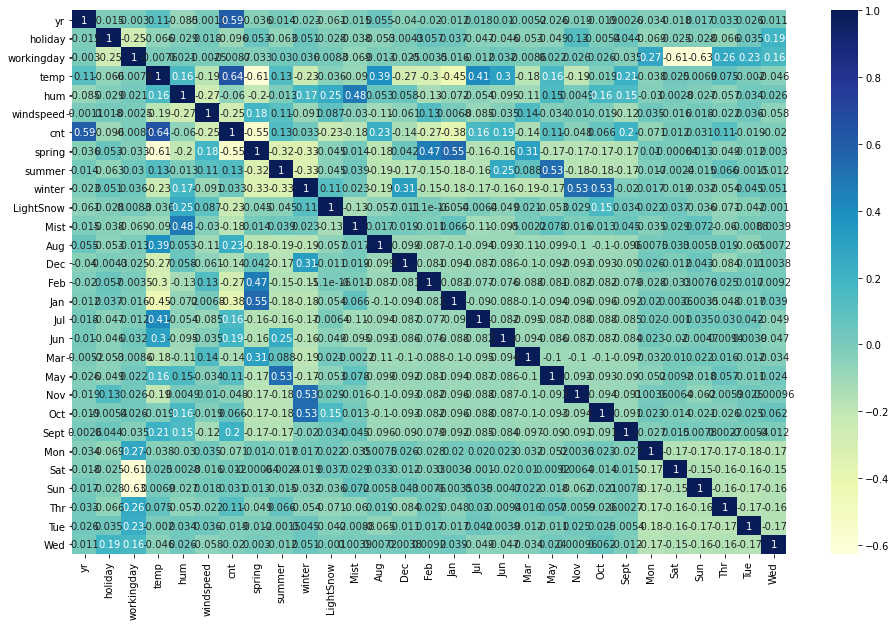

In [39]:
# Checking the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (16, 10))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

### Inference 
We can see that the 'cnt' is highly correlated to 'temp' 

### Dividing into X and Y sets for the model building

In [40]:
y_train = df_train.pop('cnt')
X_train = df_train

## Step 5: Building our model

Using the **LinearRegression function from SciKit Learn** for its compatibility with RFE (which is a utility from sklearn)


In [41]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [42]:
# Running RFE with the output number of the variable equal to 10
lm=LinearRegression()
lm.fit(X_train,y_train)

rfe=RFE(lm,10)
rfe=rfe.fit(X_train,y_train)


C:\Users\Sai Shruti\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass n_features_to_select=10 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


In [43]:
# checking the support and ranking - which tells us which variables are prioritized and considered by RFE 
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 8),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', False, 3),
 ('winter', True, 1),
 ('LightSnow', True, 1),
 ('Mist', False, 2),
 ('Aug', False, 14),
 ('Dec', False, 6),
 ('Feb', False, 7),
 ('Jan', False, 4),
 ('Jul', True, 1),
 ('Jun', False, 18),
 ('Mar', False, 19),
 ('May', False, 11),
 ('Nov', False, 5),
 ('Oct', False, 16),
 ('Sept', True, 1),
 ('Mon', False, 13),
 ('Sat', False, 9),
 ('Sun', False, 10),
 ('Thr', False, 17),
 ('Tue', False, 12),
 ('Wed', False, 15)]

In [44]:
col=X_train.columns[rfe.support_]

In [45]:
col

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'spring', 'winter',
       'LightSnow', 'Jul', 'Sept'],
      dtype='object')

In [46]:
X_train.columns[~rfe.support_]

Index(['workingday', 'summer', 'Mist', 'Aug', 'Dec', 'Feb', 'Jan', 'Jun',
       'Mar', 'May', 'Nov', 'Oct', 'Mon', 'Sat', 'Sun', 'Thr', 'Tue', 'Wed'],
      dtype='object')

### Building model using statsmodel, for the detailed statistics

In [47]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [48]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [49]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [50]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     242.9
Date:                Mon, 10 May 2021   Prob (F-statistic):          1.53e-184
Time:                        17:41:48   Log-Likelihood:                 489.69
No. Observations:                 510   AIC:                            -957.4
Df Residuals:                     499   BIC:                            -910.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3769      0.031     12.133      0.0

We can see that the P value is zero for most of the variables which is <0.05 by which we can say they all are significant

In [51]:
X_train_new = X_train_rfe


### Checking VIF values

1.  more than 10:  VIF value is definitely high, and the variable should be eliminated.

2. more than 5:  Can be okay, but it is worth inspecting.

3. less than 5: Good VIF value. No need to eliminate this variable.

Based on the above we will drop the variables with VIF >10 and rerun the modle until all the VIF are below 5 (<5)

In [52]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
0       const  56.13
3        temp   2.87
6      spring   2.53
7      winter   1.75
9         Jul   1.29
4         hum   1.26
5   windspeed   1.15
8   LightSnow   1.11
10       Sept   1.11
1          yr   1.03
2     holiday   1.01

In [53]:
#droping const only for VIF checking
X_train_new = X_train_new.drop(['const'], axis=1)


In [54]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     242.9
Date:                Mon, 10 May 2021   Prob (F-statistic):          1.53e-184
Time:                        17:41:49   Log-Likelihood:                 489.69
No. Observations:                 510   AIC:                            -957.4
Df Residuals:                     499   BIC:                            -910.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3769      0.031     12.133      0.0

In [55]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
3        hum  15.18
2       temp  13.09
4  windspeed   4.02
5     spring   2.40
0         yr   2.06
6     winter   1.98
8        Jul   1.40
9       Sept   1.20
7  LightSnow   1.11
1    holiday   1.04

In [56]:
#dropping hum as VIF >10
X_train_new = X_train_new.drop(['hum'], axis=1)


In [57]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     242.9
Date:                Mon, 10 May 2021   Prob (F-statistic):          1.53e-184
Time:                        17:41:49   Log-Likelihood:                 489.69
No. Observations:                 510   AIC:                            -957.4
Df Residuals:                     499   BIC:                            -910.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3769      0.031     12.133      0.0

In [58]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [59]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [60]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     242.9
Date:                Mon, 10 May 2021   Prob (F-statistic):          1.53e-184
Time:                        17:41:49   Log-Likelihood:                 489.69
No. Observations:                 510   AIC:                            -957.4
Df Residuals:                     499   BIC:                            -910.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3769      0.031     12.133      0.0

In [61]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
2       temp  4.40
3  windspeed  3.98
0         yr  2.06
4     spring  1.61
5     winter  1.37
7        Jul  1.34
8       Sept  1.20
6  LightSnow  1.06
1    holiday  1.04

In [62]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     242.9
Date:                Mon, 10 May 2021   Prob (F-statistic):          1.53e-184
Time:                        17:41:49   Log-Likelihood:                 489.69
No. Observations:                 510   AIC:                            -957.4
Df Residuals:                     499   BIC:                            -910.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3769      0.031     12.133      0.0

In [63]:
X_train_new.columns

Index(['yr', 'holiday', 'temp', 'windspeed', 'spring', 'winter', 'LightSnow',
       'Jul', 'Sept'],
      dtype='object')

In [64]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

In [65]:
lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

In [66]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.801
Method:                 Least Squares   F-statistic:                     228.8
Date:                Mon, 10 May 2021   Prob (F-statistic):          5.33e-171
Time:                        17:41:49   Log-Likelihood:                 454.89
No. Observations:                 510   AIC:                            -889.8
Df Residuals:                     500   BIC:                            -847.4
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2042      0.025      8.095      0.0

## Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [67]:
y_train_price = lm.predict(X_train_lm)

In [68]:
# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

C:\Users\Sai Shruti\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Errors')

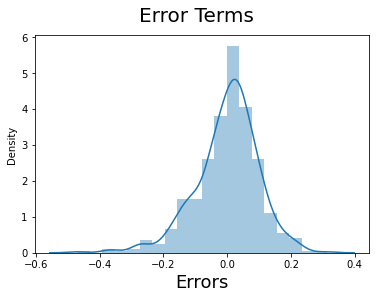

In [69]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

### Inference 
The error terms are normally distributed.

## Making Predictions

In [70]:
num_vars = ['temp','hum','windspeed','cnt']

df_test[num_vars] = scaler.transform(df_test[num_vars])


<ipython-input-70-d1b7a82a2ead>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test[num_vars] = scaler.transform(df_test[num_vars])
C:\Users\Sai Shruti\anaconda3\lib\site-packages\pandas\core\indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


Dividing into X_test and y_test


In [71]:
y_test = df_test.pop('cnt')
X_test = df_test

In [72]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [73]:
# Making predictions
y_pred = lm.predict(X_test_new)


Text(0, 0.5, 'y_pred')

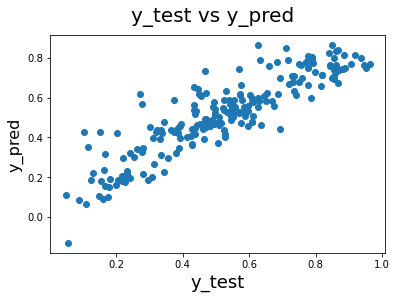

In [74]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

In [75]:
from sklearn.metrics import r2_score
r2=r2_score(y_test, y_pred)
r2

0.7888115946045292

In [76]:
n=X_test_new.shape[0]
print(n)
p=X_test_new.shape[1]
print(p)
Adjr2 = 1-(1-r2)*(n-1)/(n-p-1)
Adjr2

219
10


0.7786583058835932

## Conclusion

For 9 variables ,if constant ('const')included its 10 variables , for 10 variables the R2 obtained is 79% when we ran on Test set.
For Train set we got 80 % R2 and adjusted R2 for the same set of 10 variables.
Therefore,the Model we generated has the bestset of variables to consider to predict the Bike rental demand.

#### Final output


Train R2=81 %

Train Adjusted R2 =80%

Test R2=79%

Test Adjusted R2=78%
